In [36]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [3]:
root_dir='/Users/robinruhm/Documents/Research/Fire Hydrology/SlaterFireHydrology';
data_dir=root_dir+'/data';
processed_dir =data_dir+'/Processed';
raw_dir=data_dir+'/Raw';

In [62]:
river_names=['MercerCreek']#,'SalmonRiver','SuckerCreek']
discharge_map={'MercerCreek': '149030_00060_00003'}
#gage_ht_map={'IndianCreek': '16575_00065','SalmonRiver':'47825_00065','SuckerCreek':'117620_00065'}
header_line_num={'MercerCreek': 29}#, 'SalmonRiver':31,'SuckerCreek':29}

In [63]:
dataframe

,agency_cd,site_no,datetime,discharge_MercerCreek,149030_00060_00003_cd
0,USGS,12120000,2016-09-01,6.56,A
1,USGS,12120000,2016-09-02,23.60,A
2,USGS,12120000,2016-09-03,13.00,A
3,USGS,12120000,2016-09-04,7.96,A
4,USGS,12120000,2016-09-05,6.40,A
...,...,...,...,...,...
1149,USGS,12120000,2019-10-25,NaN,NaN
1150,USGS,12120000,2019-10-26,NaN,NaN
1151,USGS,12120000,2019-10-27,NaN,NaN
1152,USGS,12120000,2019-10-28,13.10,P


In [64]:
river = 'MercerCreek'
flow_filename=raw_dir+'/'+ river+'FlowData.txt'
dataframe=pd.read_csv(flow_filename,header=header_line_num[river], skiprows=[header_line_num[river]+1],\
        delimiter='\t', low_memory=False)
dataframe.rename(mapper={discharge_map[river]:'discharge_'+river},inplace=True, axis="columns")
flow_df = dataframe[['datetime','discharge_'+river]]
flow_df['discharge_'+river+'_daily_change']=flow_df['discharge_'+river].diff(periods=1)
split_date=flow_df['datetime'].str.split('-', expand=True)
flow_df['year']=split_date[0]
flow_df['month']=split_date[1]
flow_df['day']=split_date[2]
#flow_df.drop(columns=['datetime'], inplace=True)
flow_df['prev_discharge_' + river] = flow_df['discharge_'+river] - flow_df['discharge_'+river+'_daily_change']

/var/folders/1k/s33lj1kd7px7nbb93v5jzphc0000gn/T/ipykernel_73659/3313028829.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_df['discharge_'+river+'_daily_change']=flow_df['discharge_'+river].diff(periods=1)
/var/folders/1k/s33lj1kd7px7nbb93v5jzphc0000gn/T/ipykernel_73659/3313028829.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_df['year']=split_date[0]


In [65]:
flow_df.head()

,datetime,discharge_MercerCreek,discharge_MercerCreek_daily_change,year,month,day,prev_discharge_MercerCreek
0,2016-09-01,6.56,NaN,2016,09,01,NaN
1,2016-09-02,23.60,17.04,2016,09,02,6.56
2,2016-09-03,13.00,-10.60,2016,09,03,23.60
3,2016-09-04,7.96,-5.04,2016,09,04,13.00
4,2016-09-05,6.40,-1.56,2016,09,05,7.96


In [66]:
flow_df['prev_discharge_MercerCreek'][0]

nan

Text(0, 0.5, 'next day discharge (cfs)')

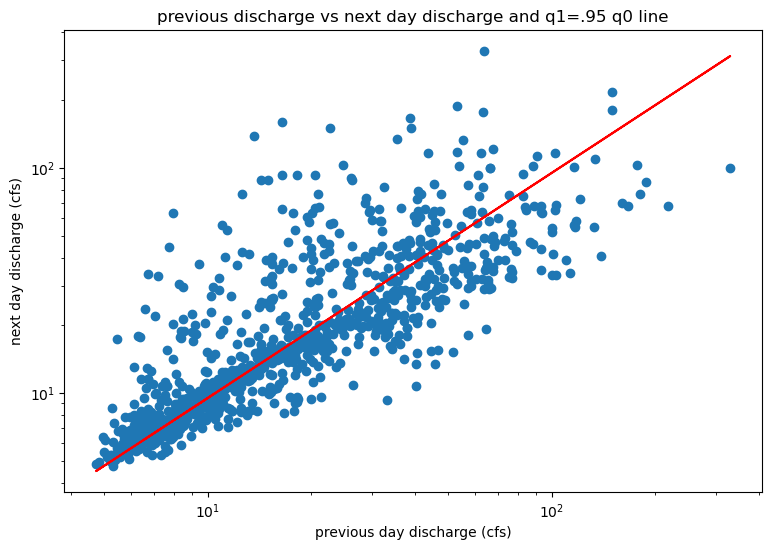

In [67]:
flow_df['pred_discharge_MercerCreek'] =  flow_df.prev_discharge_MercerCreek * .95
fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(flow_df.prev_discharge_MercerCreek, flow_df.discharge_MercerCreek)
ax.plot(flow_df.prev_discharge_MercerCreek, flow_df.pred_discharge_MercerCreek, c='r')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title("previous discharge vs next day discharge and q1=.95 q0 line")
ax.set_xlabel("previous day discharge (cfs)")
ax.set_ylabel("next day discharge (cfs)")

              

In [68]:
flow_df['baseflow_MercerCreek'] = 0
flow_df['baseflow_MercerCreek'][0] = flow_df['discharge_MercerCreek'][0]

/var/folders/1k/s33lj1kd7px7nbb93v5jzphc0000gn/T/ipykernel_73659/3954928890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_df['baseflow_MercerCreek'][0] = flow_df['discharge_MercerCreek'][0]


In [69]:
k = .95

for i in range(1, len(baseflow)):
    flow_df['baseflow_MercerCreek'][i]=k * flow_df['baseflow_MercerCreek'][i-1] + (1-k)/2 * (flow_df['discharge_MercerCreek'][i] + flow_df['prev_discharge_MercerCreek'][i])
    if flow_df['baseflow_MercerCreek'][i] > flow_df['discharge_MercerCreek'][i]:
        flow_df['baseflow_MercerCreek'][i] = flow_df['discharge_MercerCreek'][i]

<AxesSubplot:xlabel='datetime'>

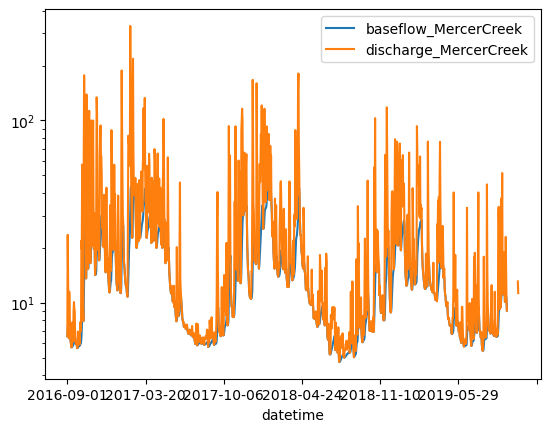

In [78]:

flow_df.plot('datetime', ['baseflow_MercerCreek', 'discharge_MercerCreek'], logy= True)


<AxesSubplot:xlabel='datetime'>

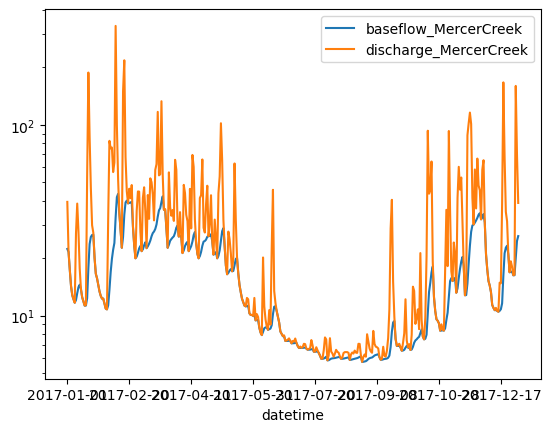

In [81]:
flow_df_2017 = flow_df[flow_df['year']=='2017']
flow_df_2017.plot('datetime', ['baseflow_MercerCreek', 'discharge_MercerCreek'], logy= True)


In [83]:
#flow_df.prev_discharge_MercerCreek, flow_df.discharge_MercerCreek
flow_df['baseflow_MercerCreek'].mean()/ flow_df['discharge_MercerCreek'].mean()

0.589198807291968